In [20]:
import pandas as pd

In [21]:
cc_Genral_df = pd.read_csv("CC GENERAL.csv")
cc_Genral_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [22]:
cc_Genral_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [23]:
cc_Genral_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [24]:
replaced_value=cc_Genral_df['MINIMUM_PAYMENTS'].mean()
cc_Genral_df['MINIMUM_PAYMENTS'].fillna(value=replaced_value, inplace=True)
cc_Genral_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [25]:
replaced_value=cc_Genral_df['CREDIT_LIMIT'].mean()
cc_Genral_df['CREDIT_LIMIT'].fillna(value=replaced_value, inplace=True)
cc_Genral_df=cc_Genral_df.drop('CUST_ID',axis=1)
cc_Genral_df.isnull().sum()


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

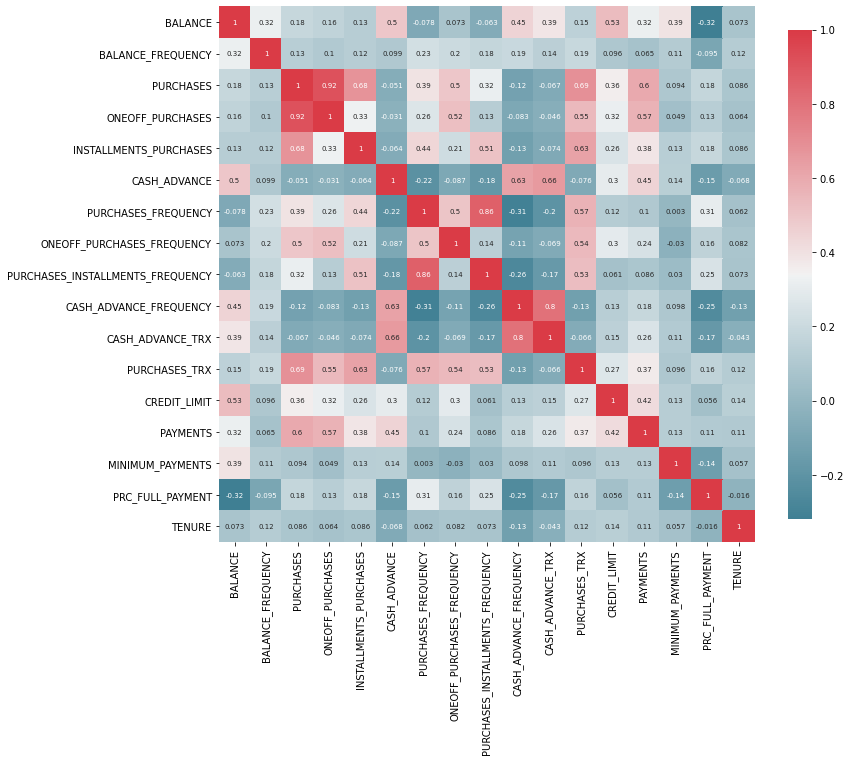

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_map( cc_Genral_df ):

    corr = cc_Genral_df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9}, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 7 }

        )
plot_correlation_map( cc_Genral_df )

In [38]:
from sklearn.cluster import AgglomerativeClustering 
model=AgglomerativeClustering(n_clusters=5 ,affinity='euclidean', linkage='complete')
model.fit_predict(cc_Genral_df)
#clust_labels=model.fit_predict(cc_Genral_df) 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
print(model.labels_)

[0 0 0 ... 0 0 0]


In [29]:
#import matplotlib.pyplot as plt
#import scipy.cluster.hierarchy as shc

#plt.figure(figsize=(10,7))
#plt.title("Customer Dendrograms")
#dend=shc.dendrogram(shc.linkage(cc_Genral_df,method="single"))

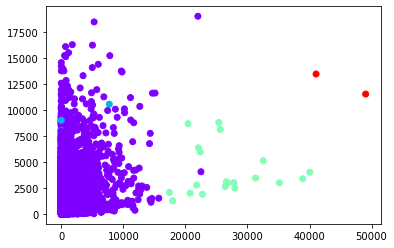

In [30]:
import matplotlib.pyplot as plt
plt.scatter(cc_Genral_df ['PURCHASES'] , cc_Genral_df ["BALANCE"] , c=model.labels_, cmap='rainbow')

In [31]:
from sklearn.cluster import KMeans  
kmeans=KMeans(n_clusters=3, random_state=0)  
kmeans.fit_predict(cc_Genral_df)

array([0, 1, 1, ..., 0, 0, 0])

In [32]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,1
2,1
3,1
4,0
...,...
8945,0
8946,0
8947,0
8948,0


C:\Users\hp\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\hp\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


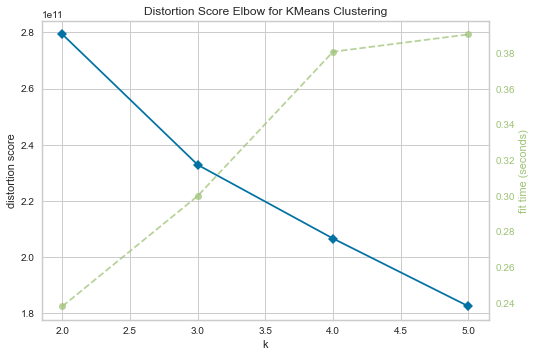

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
#elbow method 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans  
kmeans=KMeans(n_clusters=3, random_state=0) 
visualizer = KElbowVisualizer(kmeans, k=(2,6))
visualizer.fit(cc_Genral_df)        
visualizer.show()   

C:\Users\hp\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\hp\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


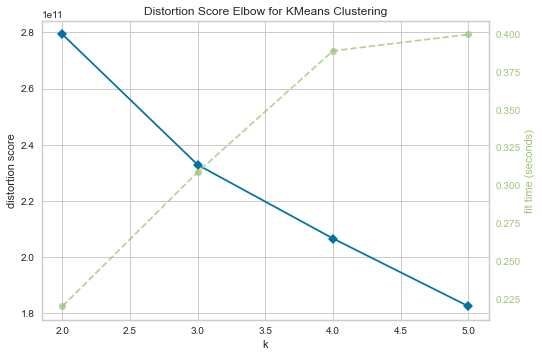

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
#elbow method 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0) 
visualizer = KElbowVisualizer(kmeans, k=(2,6))
visualizer.fit(cc_Genral_df)        
visualizer.show()   

In [36]:
kmeans.predict(cc_Genral_df)
print(kmeans.cluster_centers_)

[[7.87525310e+02 8.49448814e-01 5.09892313e+02 2.49369084e+02
  2.60819413e+02 4.83252005e+02 4.51462729e-01 1.30904213e-01
  3.47030392e-01 1.09189353e-01 2.28054545e+00 9.50563636e+00
  2.22747849e+03 9.04173576e+02 5.26793626e+02 1.48620153e-01
  1.13792727e+01]
 [5.48720526e+03 9.54910300e-01 2.40789541e+03 1.55343184e+03
  8.54576730e+02 4.13952954e+03 5.31917954e-01 3.25465421e-01
  4.01272510e-01 3.11313742e-01 9.66793893e+00 3.05114504e+01
  1.13739880e+04 5.66199017e+03 1.97499024e+03 1.07193598e-01
  1.17302799e+01]
 [4.05814769e+03 9.88636375e-01 1.02737875e+03 1.18389464e+02
  9.08989286e+02 9.22757849e+02 4.71320321e-01 3.92315536e-02
  4.41152625e-01 1.05654714e-01 3.01785714e+00 1.86250000e+01
  4.26785714e+03 1.62493914e+03 2.27600316e+04 1.48808929e-03
  1.19107143e+01]
 [5.14958549e+03 9.04434585e-01 1.95473678e+04 1.43043888e+04
  5.24297902e+03 4.86981405e+03 8.28861756e-01 6.90243927e-01
  6.98373976e-01 1.40243878e-01 7.80487805e+00 1.10658537e+02
  1.48926829e+04